# 7. Autoencoders for image generation

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.python.keras import Input, Model
from tensorflow.python.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, UpSampling2D, Reshape
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.datasets import mnist, cifar10
from tensorflow.python.keras.utils import to_categorical

# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [0]:
# set random seeds for more reproducible results
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(43)

In [3]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print(x_train.shape, y_train.shape)
gray = False
train_size = len(y_train)
test_size = len(y_test)
xdim = x_train.shape[1]
ydim = x_train.shape[2]
print(x_train.dtype, y_train.dtype)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000,)
uint8 uint8


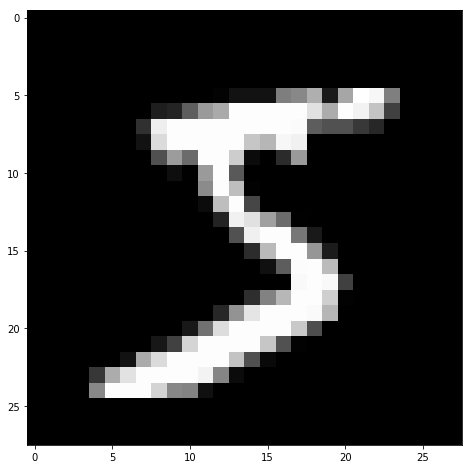

In [4]:
plt.imshow(x_train[0,...,0], cmap='gray')

In [5]:
print(np.min(x_train), np.max(x_train), np.median(x_train))
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

0 255 0.0
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))


In [0]:
x_train = np.asarray([x for x,y in zip(x_train,y_train) if y in (2,3,5,6,8)])


In [0]:
n_classes = len(np.unique(y_train))
x_train = shuffle(x_train, random_state=44)
x_train = x_train/255
x_test = x_test/255


In [0]:
def get_model():
    inputs = Input(shape=(xdim, ydim,1))
    f = Conv2D(filters=8, kernel_size=3, activation='relu', padding='same')(inputs)
    f = MaxPooling2D()(f)
    f = Conv2D(filters=8, kernel_size=3, activation='relu', padding='same')(f)
    f = MaxPooling2D()(f)
    f = Conv2D(filters=2, kernel_size=3, activation='relu', padding='same')(f)
    encoded = MaxPooling2D(padding='same')(f)
    
    f = Conv2D(filters=2, kernel_size=3, activation='relu', padding='same')(encoded)
    f = UpSampling2D()(f)
    f = Conv2D(filters=8, kernel_size=3, activation='relu', padding='same')(f)
    f = UpSampling2D()(f)
    f = Conv2D(filters=8, kernel_size=3, activation='relu')(f)
    f = UpSampling2D()(f)
    outputs = Conv2D(filters=1, kernel_size=3, activation='sigmoid', padding='same')(f)
    
    return Model(inputs=inputs, outputs=outputs), Model(inputs=inputs, outputs=encoded)

In [9]:
model, encoder = get_model()

print(model.summary())
model.compile(optimizer='adadelta', loss='binary_crossentropy')
history = model.fit(x=x_train, y=x_train, batch_size=512, epochs=300, validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 2)           146       
_________________________________________________________________
max_

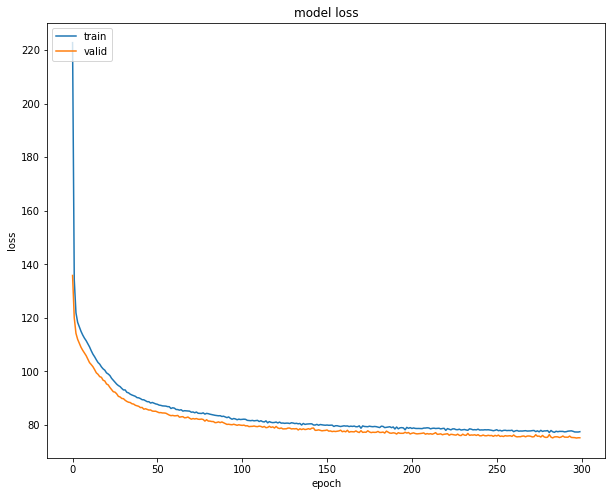

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [0]:
x_normal = np.asarray([x for x,y in zip(x_test,y_test) if y in (2,3,5,6,8)])
x_novel = np.asarray([x for x,y in zip(x_test,y_test) if y==4])
recon_normal = model.predict(x_normal)
recon_novel = model.predict(x_novel)

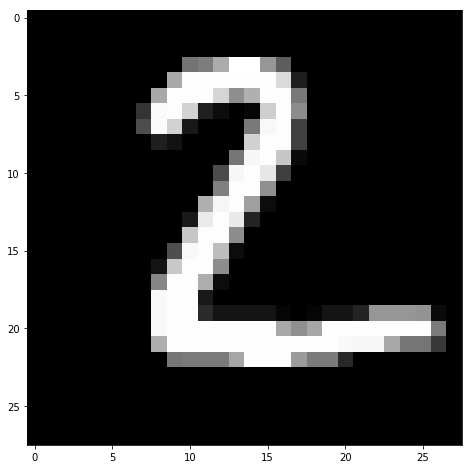

In [12]:
plt.imshow(x_normal[0,...,0], cmap='gray')


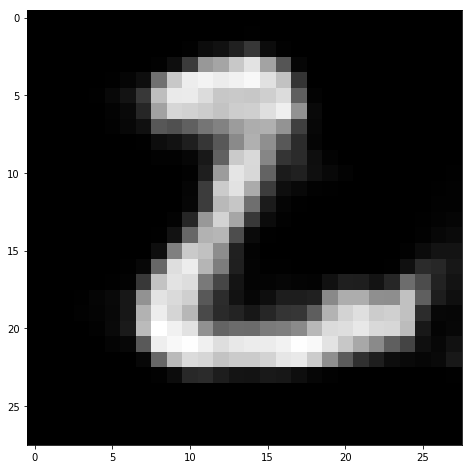

In [13]:
plt.imshow(recon_normal[0,...,0],cmap='gray')

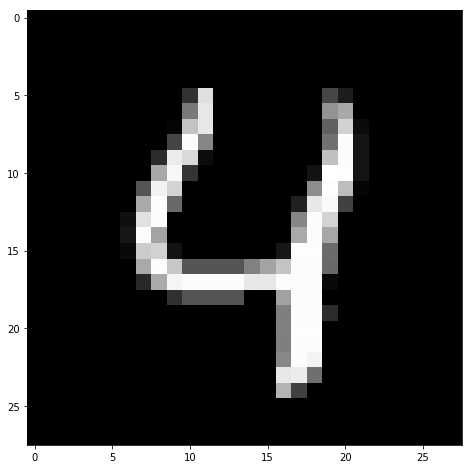

In [14]:
plt.imshow(x_novel[0,...,0], cmap='gray')

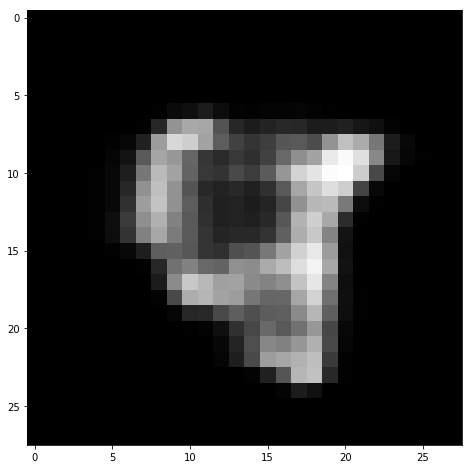

In [15]:
plt.imshow(recon_novel[0,...,0],cmap='gray')

0.14902066249683982 0.18833223472223962


(array([ 0.08284083,  0.91124916,  3.23079247,  5.71601745,  8.69828743,
        10.52078575, 12.50896573, 10.85214908,  7.8698791 ,  5.71601745,
         5.21897246,  3.8106783 ,  2.81658831,  1.65681665,  0.91124916,
         0.57988583,  0.        ,  0.08284083,  0.        ,  0.16568167]),
 array([0.09868673, 0.11097934, 0.12327195, 0.13556456, 0.14785717,
        0.16014978, 0.17244239, 0.184735  , 0.1970276 , 0.20932021,
        0.22161282, 0.23390543, 0.24619804, 0.25849065, 0.27078326,
        0.28307586, 0.29536847, 0.30766108, 0.31995369, 0.3322463 ,
        0.34453891]),
 <a list of 20 Patch objects>)

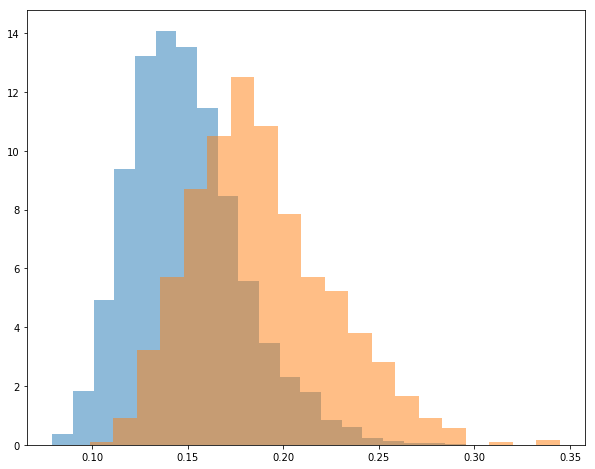

In [16]:
error_normal = -np.mean(np.log(recon_normal+1e-19)*x_normal+np.log(1-recon_normal+1e-19)*(1-x_normal),axis=(1,2,3))
error_novel = -np.mean(np.log(recon_novel+1e-19)*x_novel+np.log(1-recon_novel+1e-19)*(1-x_novel),axis=(1,2,3))
print(np.mean(error_normal),np.mean(error_novel))
plt.hist(error_normal, 20, density=True, alpha=0.5, label='normal')
plt.hist(error_novel, 20, density=True, alpha=0.5, label='novel')

In [0]:
code_normal = np.reshape(encoder.predict(x_normal),(-1,32))
code_novel = np.reshape(encoder.predict(x_novel),(-1,32))

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca')
low = tsne.fit_transform(np.vstack((code_normal,code_novel)))


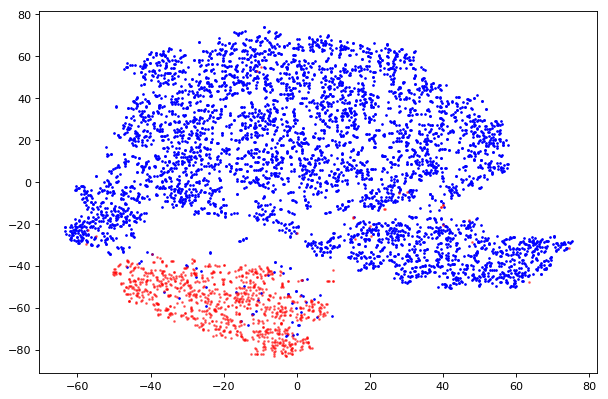

In [19]:
t_normal = low[:len(code_normal)]
t_novel = low[len(code_normal):]
fig=plt.figure(figsize=(9,6), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(t_normal[:,0],t_normal[:,1],color='b',s=2)
plt.scatter(t_novel[:,0],t_novel[:,1],color='r',alpha=0.5,s=2)
plt.show()
